### Student Details

Student Name: Tendai Chaka

Student ID: 20041829


# Task 2: scikit learn

In [1]:
# import dependencies
import numpy as np

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [2]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

################################
# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# petal length and petal width
X = df.iloc[0:100, [2,3]].values


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

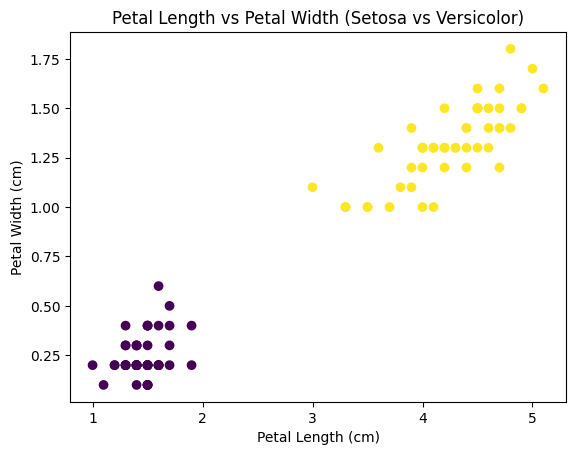

In [3]:
################################
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);
# Add labels for x-axis, y-axis, and a title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width (Setosa vs Versicolor)')

# Display the plot
plt.show()


5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [4]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 
from sklearn.model_selection import train_test_split
################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#create and train perceptron
perceptron = Perceptron(verbose=1)
perceptron.fit(X_train, y_train)


-- Epoch 1
Norm: 1.13, NNZs: 2, Bias: -2.000000, T: 67, Avg. loss: 0.211343
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 2, Bias: -2.000000, T: 134, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 2, Bias: -2.000000, T: 201, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 2, Bias: -2.000000, T: 268, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 2, Bias: -2.000000, T: 335, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.13, NNZs: 2, Bias: -2.000000, T: 402, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.13, NNZs: 2, Bias: -2.000000, T: 469, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

The output suggests that YES it converges quickly. This is because average loss drops from 0.211343 to 0 by the second epoch and remains there throughout the rest of the training. This indicates that the model has learned to perfectly classify the data early in the training process.

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

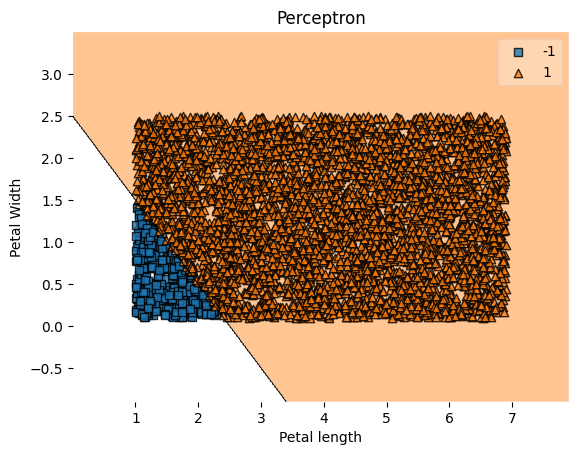

In [5]:
import random

import random
from mlxtend.plotting import plot_decision_regions

################################
#Using many random inputs (e.g. 5000), plot to see if you can see the decision boundary.
petal_length_range = (1.0, 6.9) 
petal_width_range = (0.1, 2.5)

#Get random petal lengths and widths in uniform distribution
length = np.random.uniform(petal_length_range[0], petal_length_range[1], 5000)
width = np.random.uniform(petal_width_range[0], petal_width_range[1], 5000)

x_samples = np.column_stack((length, width))
y_samples = perceptron.predict(x_samples)
plot_decision_regions(x_samples, y_samples, clf=perceptron)
plt.title('Perceptron')
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.show()


# Task 3: Exploration
#### Commonality and differences between artificial neurons and biological neurons

In a biological brain, neurons function as the building blocks of a neural network. Here, the dendrites receive messages with varying intensities. These input signals are then gathered in the neuron's cell body, and if the total signal there exceeds a predetermined threshold, an output signal is created and sent along the axon. Input values for artificial neurons can be real integers that represent features or data points[1]. Each input has a weight attached to it that controls how much of an impact it has on the neuron's output. Weights are variables that regulate how tightly a neuron is connected to its inputs. To ensure that the neuron's output matches the expected output, they are modified during the training process. The inputs are summarised after being linearly mixed with the corresponding weights. The addition of a bias term is frequently added after this summary. An activation function is then applied to the output of the summation function. The model gains non-linearity from this function, which enables it to recognise intricate patterns. 
##### Artificial neurons as a model of biological neurons
Both are essential building blocks for processing information. They take in signals as input, process those signals, then output a signal. By conducting weighted sums of the inputs, followed by the application of activation functions to determine the output, artificial neurons in neural networks simulate this process. Similar to electrical neurons, biological neurons take electrochemical signals from dendrites, integrate them into the cell body, and then convey messages through the axon. Furthermore, three basic components make up a biological neuron, the soma, the central cell body; dendrites and axons, two different kinds of branched, treelike structures that stretch from the soma.[4] Similarily, A node or unit is the name for the central portion of an artificial neuron. Wires that simulate the connections between organic neurons are used to physically connect them to one another[4]. Both these models are also able to learn from past experiences to improve perfomance levels. Biological neural networks process information in parallel; this is also true of artificial neural networks[4]. 
##### Differences, are they a good model
However there are several differences in between these models, Biological neurons are far more complex than artificial ones, having sophisticated biochemical reactions and intricate connections inside the brain, whereas artificial neurons are greatly simplified abstractions. Furthermore, whereas real neurons might behave stochastically, artificial neurons function deterministically. For instance some biological neurons have an average firing rate of 200 times per second. The continuous, floating-point weight values are the information carriers in artificial neurons[2]. While artificial neurons take continuous values as inputs, perceptrons in artificial neurons function relatively similarly. Additionally, the signals' timing is synchronous, meaning that artificial neurons located in the same layer receive input signals and simultaneously send out their output signals. Because of their topology, biological neuron networks are also fault-tolerant. Due to redundant information storage, minor failures won't cause memory loss. They lack a single "central" component. The brain may regenerate and heal to some degree as well. Similar to fatigue, artificial neural networks are not designed for fault tolerance or self-regeneration; nevertheless, recovery is feasible by saving the current state (weight values) of the model and continuing training from that save state[2]. Overall, there are notable variations in the complexity, flexibility, and adaptability of BNNs and ANNs despite the fact that they share many fundamental building blocks. BNNs are extremely sophisticated and flexible systems that can process data in parallel. Because of their plasticity, BNNs may learn and change over time[3]. ANNs, on the other hand, are more straightforward systems that are created to carry out particular tasks. Their connections are often set, and the network architecture is predetermined by the creator. Hence my conclusion is artificial neurons are a good base model but theyre not accurately the same.



[1]https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

[2]https://towardsdatascience.com/the-differences-between-artificial-and-biological-neural-networks-a8b46db828b7

[3]https://quillbot.com/?utm_medium=cpc&utm_source=google&utm_campaign=FA+-+HY+|+PERF+-+Search+|+Product+-+Ext+-+Chrome+-+Brand+|+PREM+|+CPA&utm_term=quillbot&utm_content=664002326057&campaign_type=extension-19199908990&click_id=CjwKCAjwvrOpBhBdEiwAR58-3J69ePORqx-aHYgE7HU8tkJtQ5MYOxcAG8BthALp8TYXCtwsPMvmLhoCubIQAvD_BwE&campaign_id=19199908990&adgroup_id=145923410322&ad_id=664002326057&keyword=quillbot&placement=&target=&network=g&extension=23083258234&gclid=CjwKCAjwvrOpBhBdEiwAR58-3J69ePORqx-aHYgE7HU8tkJtQ5MYOxcAG8BthALp8TYXCtwsPMvmLhoCubIQAvD_BwE

[4]https://d1wqtxts1xzle7.cloudfront.net/34415923/Eluyode_DT-libre.pdf?1407773797=&response-content-disposition=inline%3B+filename%3DScholars_Research_Library_Comparative_st.pdf&Expires=1697807848&Signature=PeN-llENfjo9M5Zasc4hpAhERIRsZwxytG6xIkvsPNBa3YmTu36BdRsABtvgLBrWA9MtOGr-VFguUnA1lM5XJ2xWSkkHmgK6IsRuHB0zIErV1UUPVmoopauPj3a2eK0D7bnBBjJ0a1fmJ80Tib9Me6SvfuibjLWt0R9LWMSqWeNbxCLCqkgjIZDWBH6S4HAJxOw-UYEBLFwKsKdHqYflArJX8NSwr-03e2xnPasLC3pHmQurVuHhhHWOR7AT5hLpq7vhcR4wQMQaSgKxd20OkqEcNqFhK0wxaJzUYKPpk980OeygP2lTJiTgNsYLgvDzvJwW6gR2AnyXO-6kA5seKQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA